# Experiment 5: Aleatory Linear and Circle

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


### experiment parameters
N_SAMPLES = 100
N_LOCAL_NETWORKS_MIN = 3
N_LOCAL_NETWORKS_MAX = 10
N_VAR_NETWORK = 5
N_OUTPUT_VARIABLES = 2
N_INPUT_VARIABLES = 2
V_TOPOLOGY = 4,3  # path, cycle graph
N_CLAUSES_FUNCTION = 2
N_DIRECTED_EDGES = 1

In [44]:
# external imports
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
df = pd.read_csv("exp5_aleatory_linear_circle.csv")
df.keys()

Index(['Unnamed: 0', 'i_sample', 'n_local_networks', 'n_var_network',
       'v_topology', 'n_output_variables', 'n_clauses_function',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [45]:
df.head(10)

,Unnamed: 0,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,0,1,3,5,4,2,2,10,12,8,0.058156,0.000023,0.000041
1,1,1,3,5,3,2,2,12,24,8,0.066684,0.000028,0.000186
2,2,2,3,5,4,2,2,5,3,1,0.045829,0.000023,0.000017
3,3,2,3,5,3,2,2,6,6,1,0.052465,0.000030,0.000026
4,4,3,3,5,4,2,2,5,3,1,0.055720,0.000037,0.000027
5,5,3,3,5,3,2,2,6,6,1,0.064581,0.000027,0.000024
6,6,4,3,5,4,2,2,5,3,1,0.043188,0.000021,0.000016
7,7,4,3,5,3,2,2,6,6,1,0.059743,0.000030,0.000027
8,8,5,3,5,4,2,2,5,3,1,0.050630,0.000027,0.000022
9,9,5,3,5,3,2,2,6,6,1,0.061464,0.000026,0.000024


In [46]:
# Resume
print("Experiment Structural - Ring - Aleatory")
print("Number of samples:", df["i_sample"].max())
print("Range of local networks:", df["n_local_networks"].min(), " - ", df["n_local_networks"].max())

Experiment Structural - Ring - Aleatory
Number of samples: 10
Range of local networks: 3  -  9


<BarContainer object of 140 artists>

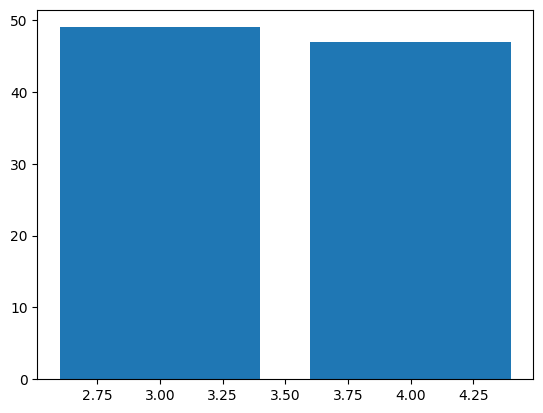

In [47]:
# Crea un gráfico de línea
plt.bar(df["n_local_networks"], df["n_local_attractors"])

<BarContainer object of 140 artists>

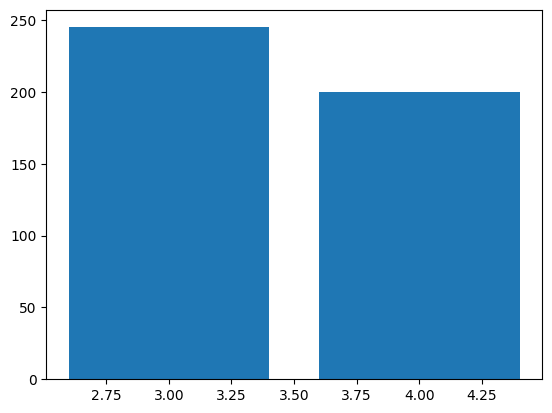

In [48]:
plt.bar(df["n_local_networks"], df["n_pair_attractors"])

<BarContainer object of 140 artists>

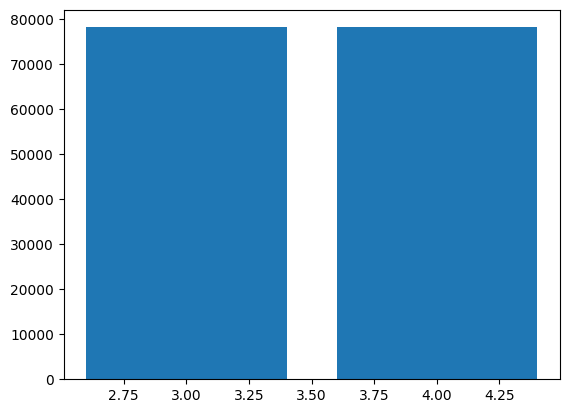

In [49]:
plt.bar(df["n_local_networks"], df["n_attractor_fields"])

KeyError: 5

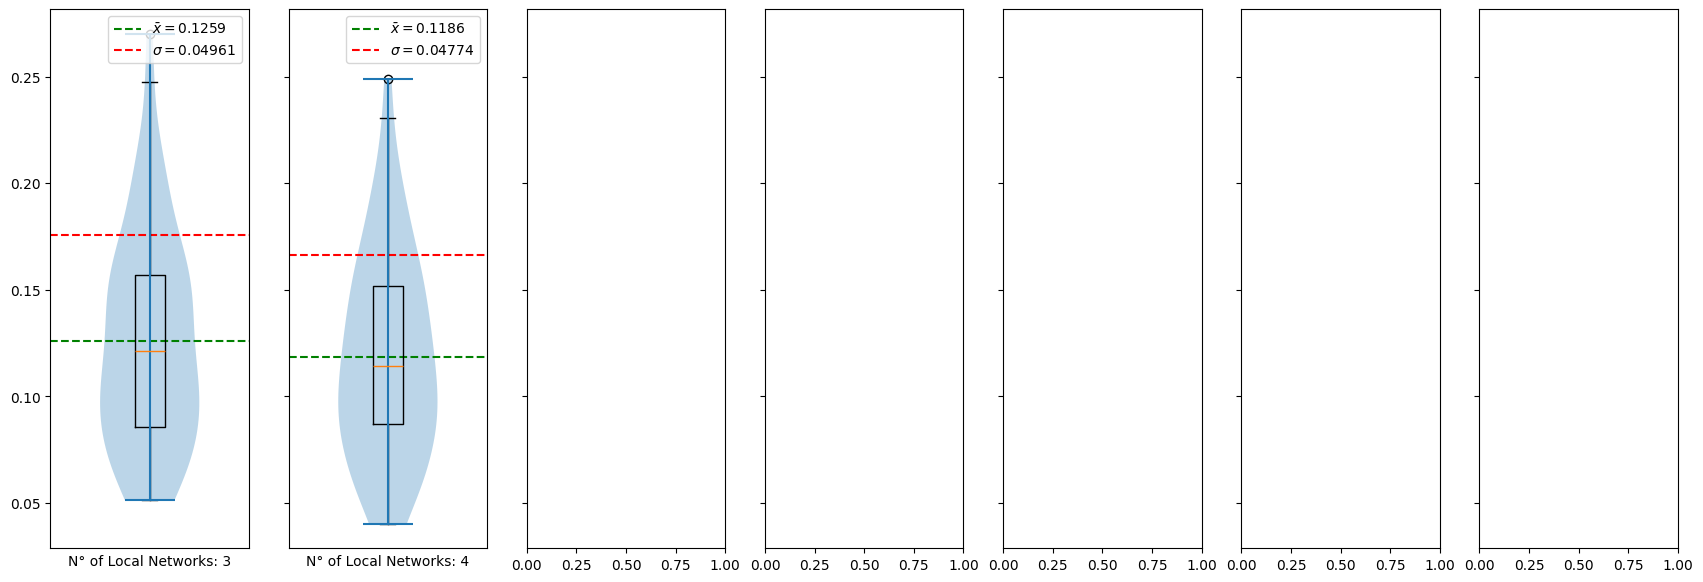

In [50]:
n_local_net = df['n_local_networks'].unique()
labels = {key:label for key, label in zip(df.keys()[-3:], [
          "Number of attractors",
          "Number of pairs attractors",
          "Number of attractor fields"])}
log_scale = {key:label for key, label in zip(df.keys()[-3:], [
          False,
          False,
          True])}
grouped = df.groupby("n_local_networks")

for key in df.keys()[-3:]:
    fig, axs = plt.subplots(1, n_local_net.size, figsize=(n_local_net.size * 3, 7), sharey=True)
    for ax, i_local_net in zip(axs, n_local_net):
        group = grouped.get_group(i_local_net)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of Local Networks: {i_local_net}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)